# NFL Player Draft Round Prediction

Member 1: Vahinreddy Palle, Contribution: 33% \\
Member 2: Shriyans Sairy, Contribution: 33% \\
Member 3: Arjav Jain, Contribution: 33%

**Vahin Palle:** We collaborated on every aspect of this project, working together to locate, process, analyze the data, and develop the machine learning components. \\
**Shriyans Sairy:** We collaborated on every aspect of this project, working together to locate, process, analyze the data, and develop the machine learning components." \\
**Arjav Jain:** We collaborated on every aspect of this project, working together to locate, process, analyze the data, and develop the machine learning components.

## Introduction

The overall objective is to use a series of player statistics from our dataset, ranging from 2012 to 2023, to predict the round in which a player was drafted into the NFL.

It also serves as an overview of how certain player attributes and performance metrics correlate with their draft outcomes. By knowing which statistics affect the draft position of a player the most, teams, scouts, and analysts will be better at talent evaluation and adjust their strategies for future drafts. Given that the NFL draft is one of the highly awaited events for any team or fan, using data to predict draft outcomes not only provides a deeper insight into how players are evaluated but also shows the increased use of data analytics in professional sports.

It is with this in mind that we explore this dataset to build predictive models that show how data-driven insights can supplement traditional scouting methods to facilitate a holistic approach toward player evaluation in the NFL.

## Introduction


## Data Curation and Preprocessing
The project curation was adapted from two Kaggle datasets, namely NFL Weekly Player Data (1999-2022) and NFL Contract and Draft Data; it specifically narrows down the curated data to the statistics of players who played between 2012 and 2023. The datasets are encompassed with different features describing player performance, contracts, and draft information. The value of key features includes value_norm-normalized contract value, gtd_norm-normalized guaranteed value of the contract, total_yards is the total yardage gathered, total_tds is the total touchdowns created, and fantasy_points_ppr is the points per reception in fantasy football.
We have quite a bit of publicly available data on everything from individual player statistics to team and season-level data. We have decided these are the best datasets that combine the metrics on both performance and financials towards the development of our objective of predicting the round. Using this data, we look at how specific attributes correlate with draft outcomes to derive meaningful insights from player evaluation.


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('2024_player_predictions.csv')
df2 = pd.read_csv('combined_data_2000-2023.csv')
df.head()

,team,player_id,player_name,position,depth,draft_year,draft_round,draft_pick,draft_ovr,height,...,fantasy_points_ppr,position_fantasy_rank,total_fantasy_rank,pass_attempts,complete_pass,incomplete_pass,passing_yards,passing_air_yards,interception,pass_td
0,BUF,00-0034857,Josh Allen,QB,1,2018,1,7,7,77,...,374.48,1,1,522,322,150,3537,3817,11,25
1,DAL,00-0036358,CeeDee Lamb,WR,1,2020,1,17,17,74,...,373.00,1,2,0,0,0,0,0,0,0
2,DAL,00-0033077,Dak Prescott,QB,1,2016,4,37,135,74,...,368.36,2,3,611,391,161,3949,4334,6,29
3,MIA,00-0033040,Tyreek Hill,WR,1,2016,5,28,165,70,...,365.90,2,4,0,0,0,0,0,0,0
4,PHI,00-0036389,Jalen Hurts,QB,1,2020,2,21,53,73,...,357.16,3,5,501,303,143,3174,3520,8,20


## Basic Data Exploration and Summary Statistics

### Conclusion 1: Comparing the Distributions of Fantasy Rankings of QBs and WRs


Let's compare the distributions of position fantasy ranks for quarterbacks and wide receivers. We will do so by conducting a two sample T-test with the following hypotheses:

$h_0= $ There is no significant difference in mean fantasy rankings of quarterbacks and wide receivers \\
$h_A= $ There is a significant difference in mean fantasy rankings of quarterbacks and wide receivers

In [53]:
from scipy import stats

qb_fantasy_rank = df[df['position'] == 'QB']['position_fantasy_rank']
wr_fantasy_rank = df[df['position'] == 'WR']['position_fantasy_rank']

t_stat, p_value = stats.ttest_ind(qb_fantasy_rank, wr_fantasy_rank)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -5.285739887077887, P-value: 7.591124632677668e-07


Since the p-value is much smaller than 0.05, we reject the null hypothesis. This means there is a statistically significant difference between the fantasy rankings of quarterbacks (QB) and wide receivers (WR).
The negative t-statistic suggests that, on average, quarterbacks (QB) have a better (lower) fantasy ranking than wide receivers (WR).

<ipython-input-54-13fa7512525b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='position', y='position_fantasy_rank', data=df_subset, palette='Set2')


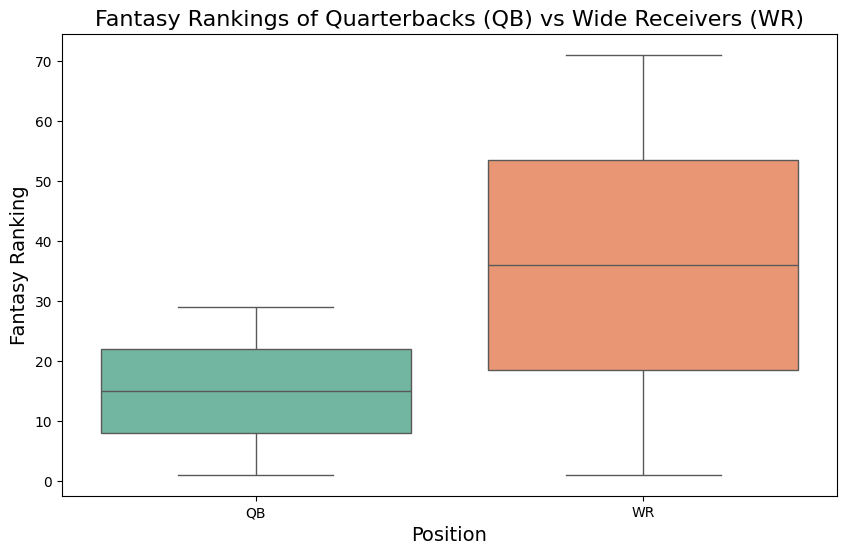

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of the data for QB and WR fantasy ranks
df_subset = df[df['position'].isin(['QB', 'WR'])]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='position', y='position_fantasy_rank', data=df_subset, palette='Set2')

# Add labels and title
plt.title('Fantasy Rankings of Quarterbacks (QB) vs Wide Receivers (WR)', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Fantasy Ranking', fontsize=14)

# Display the plot
plt.show()

### Conclusion 2: Comparing the Distributions of Contract Amounts Across Different Positions


Let's compare the distributions of contracts across different positions. We will do so by conducting a chi-squared test with the following hypotheses:

$h_0= $ The position of an NFL player does not affect the amount of total money they will receive in their contract \\
$h_A= $ The position of an NFL player affects the amount of total money they will receive in their contract

In [55]:
from scipy.stats import chi2_contingency

position = df['position']
# df2 is the df for the 2nd dataset
contract = df2['value_norm']

# Create a contingency table
contingency_table = pd.crosstab(position, contract)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 506.3533106686093
p-value: 0.3880841152895273
Degrees of Freedom: 498
Expected Frequencies:
 [[0.16477273 0.16477273 0.32954545 0.16477273 0.16477273 0.16477273
  0.16477273 0.32954545 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.32954545 0.16477273 0.16477273
  0.32954545 0.16477273 0.16477273 0.16477273 0.32954545 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.32954545 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
 

Since the p-value is greater than the typical significance level (e.g., 0.05), we fail to reject the null hypothesis. This means that there is no statistically significant evidence to suggest that the position of an NFL player affects the total contract amount they receive. The chi-square statistic of 506.35 with 498 degrees of freedom suggests that the observed frequencies (actual contract amounts by position) do not differ significantly from the expected frequencies (what we would expect if there were no relationship between position and contract amount).

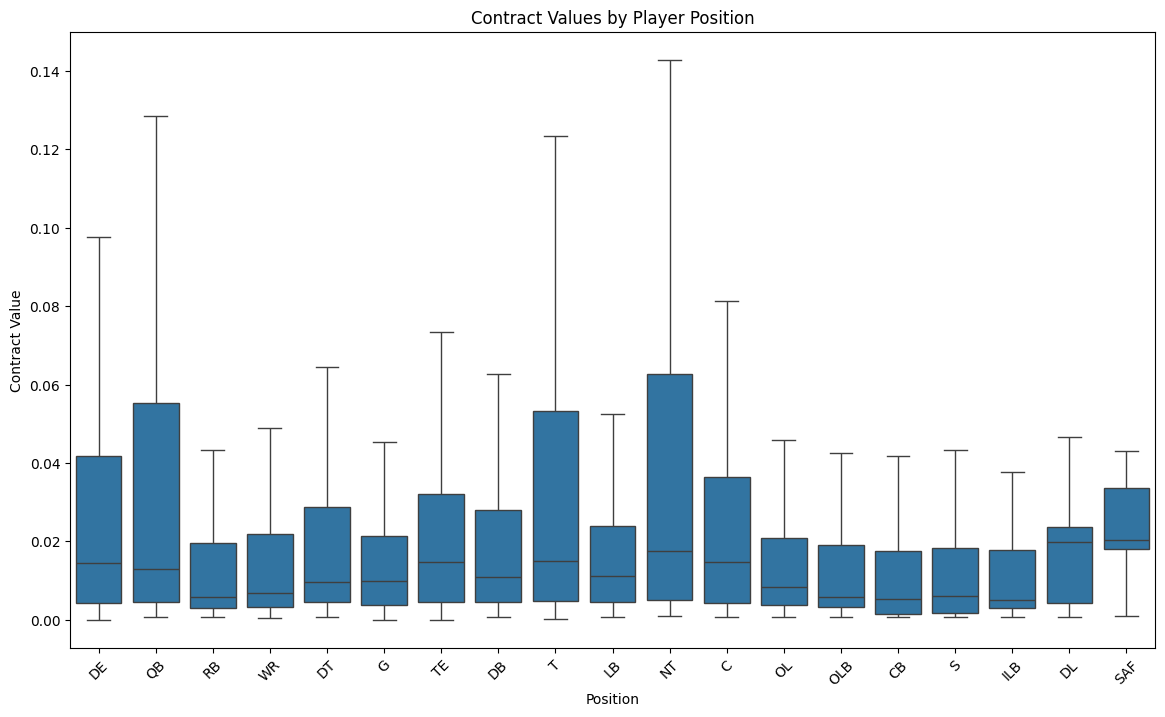

In [56]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='pos', y='value_norm', data=df2, showfliers=False)
plt.title('Contract Values by Player Position')
plt.xlabel('Position')
plt.ylabel('Contract Value')
plt.xticks(rotation=45)
plt.show()

### Conclusion 3: Comparing Average Fantasy Points by Position

Calculate the mean or median fantasy points for each position and compare them.

In [57]:
mean_fantasy_points_by_position = df.groupby('position')['fantasy_points_ppr'].mean()
mean_fantasy_points_by_position

,fantasy_points_ppr
position,
QB,237.280000
RB,187.850000
TE,114.627778
WR,179.043662


According to the analysis, quarterbacks seem to have the highest average fantasy points of 237.28, followed by running backs with 187.85, and wide receivers with 179.04. Surprisingly, tight ends have the lowest average of fantasy points at 114.63. It is implied that, in terms of producing fantasy points, quarterbacks tend to be the most productive position, while tight ends tend to average less. The reason for these relatively high points for quarterbacks could be that they play a key role in most offensive activities, hence the high value in fantasy leagues.

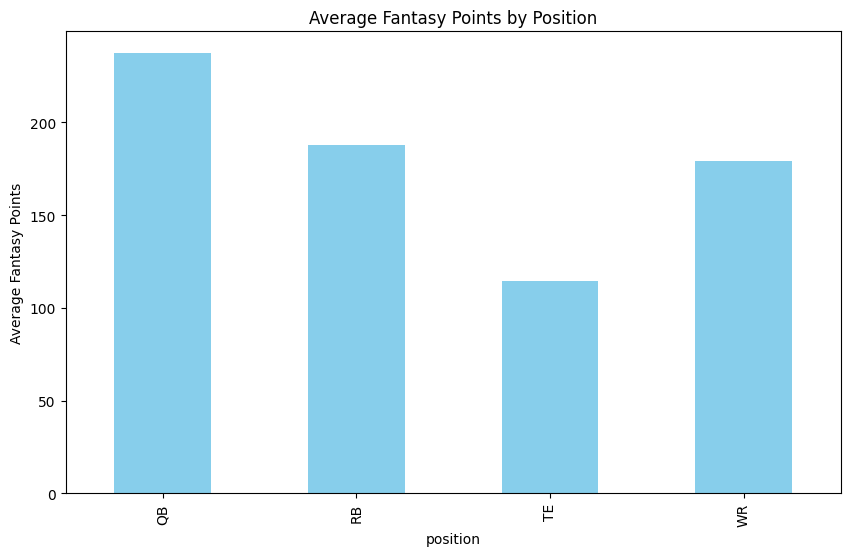

In [58]:
# BAR PLOT
# Create a bar plot of the mean fantasy points by position
plt.figure(figsize=(10,6))
mean_fantasy_points_by_position.plot(kind='bar', color='skyblue')
plt.title('Average Fantasy Points by Position')
plt.ylabel('Average Fantasy Points')
plt.show()

These results have shown us possible avenues to explore for trying to predict how contract values and positions could influence fantasy rankings and/or player performance.

## Machine Learning

We now want to utilize machine learning to see if there is a way to predict the round in which a player was drafted based on the data we have about their performance and value as a player. Although machine learning is a term that covers multiple topics and is essentially just different algorithms for a computer to "learn" and develop connections, we will be focusing on one particularly effective technique for our analysis.
We will be using the Random Forest Classifier to acheive this. Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) of the individual trees. It's particularly well-suited for our task because it can handle complex relationships between features, is resistant to overfitting, and can provide insights into feature importance.

We chose this technique as we can feed our algorithm several different features or data points. In our case, these are going to be various player statistics and metrics that indicate a player's value, such as contract value, career total touchdowns, and career total yards. We are using all the possible features in the dataset that don't directly indicate the draft round but could potentially influence it.

This approach can provide important insights for NFL teams in their drafting process. By analyzing historical data, teams can better predict which round a player with certain characteristics is likely to be drafted in. It can also help teams identify potentially undervalued players who might be available in later rounds.

To create our training model, we first have to define all the important features that we have in our dataset. These would include various player statistics, physical measurements, and performance metrics. After we have done this, we will apply the Random Forest Classifier, allowing the algorithm to train on a certain set of data and then use the remaining data to validate the model's performance.

Initial Random Forest Classifier Model: We utilize the Random Forest Classifier to predict the draft round based on various player metrics. The initial model achieves a promising accuracy, indicating the potential of using historical player data to predict draft outcomes. This model not only provides predictions but also offers insights into which features are most important in determining a player's draft round, providing valuable information for NFL teams in their drafting strategies.

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

weekly_player_data_df = pd.read_csv("/content/weekly_player_data.csv")
combined_data_df = pd.read_csv("/content/combined_data_2000-2023.csv")


# Merge datasets on player_name (or other suitable column)
merged_df = pd.merge(weekly_player_data_df, combined_data_df,
                     left_on='player_name', right_on='player',
                     how='inner')
# Display first few columns of the merged_df
merged_df.head(10)

,team,player_id,player_name,position,season,week,game_type,pass_attempts,complete_pass,incomplete_pass,...,pos,g,search_key,id,year_signed,signing_tm,value,value_norm,gtd,gtd_norm
0,TEN,00-0035676,A.J. Brown,WR,2019,1,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2022.0,Eagles,100000000.0,0.480307,56470471.0,0.271232
1,TEN,00-0035676,A.J. Brown,WR,2019,1,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2019.0,Titans,5652368.0,0.030034,3377738.0,0.017948
2,TEN,00-0035676,A.J. Brown,WR,2019,2,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2022.0,Eagles,100000000.0,0.480307,56470471.0,0.271232
3,TEN,00-0035676,A.J. Brown,WR,2019,2,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2019.0,Titans,5652368.0,0.030034,3377738.0,0.017948
4,TEN,00-0035676,A.J. Brown,WR,2019,3,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2022.0,Eagles,100000000.0,0.480307,56470471.0,0.271232
5,TEN,00-0035676,A.J. Brown,WR,2019,3,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2019.0,Titans,5652368.0,0.030034,3377738.0,0.017948
6,TEN,00-0035676,A.J. Brown,WR,2019,4,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2022.0,Eagles,100000000.0,0.480307,56470471.0,0.271232
7,TEN,00-0035676,A.J. Brown,WR,2019,4,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2019.0,Titans,5652368.0,0.030034,3377738.0,0.017948
8,TEN,00-0035676,A.J. Brown,WR,2019,5,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2022.0,Eagles,100000000.0,0.480307,56470471.0,0.271232
9,TEN,00-0035676,A.J. Brown,WR,2019,5,REG,0.0,0.0,0.0,...,WR,60.0,"A.J. Brown, WR",4417,2019.0,Titans,5652368.0,0.030034,3377738.0,0.017948


In [64]:
# Define target and features
target_column = 'rnd'  # Replace with actual target column
feature_columns = ['value_norm', 'gtd_norm', 'total_yards', "total_tds", "fantasy_points_ppr"]

X = merged_df[feature_columns]
y = merged_df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.92      0.92      8330
         2.0       0.88      0.88      0.88      6002
         3.0       0.85      0.87      0.86      6665
         4.0       0.81      0.80      0.80      4393
         5.0       0.76      0.76      0.76      3697
         6.0       0.79      0.80      0.79      3728
         7.0       0.80      0.74      0.77      1944

    accuracy                           0.85     34759
   macro avg       0.83      0.82      0.83     34759
weighted avg       0.85      0.85      0.85     34759

Accuracy Score: 0.8476941223855692
Confusion Matrix:
[[7624  133  193  152  109   82   37]
 [ 150 5306  190  124  103   91   38]
 [ 151  169 5788  175  182  134   66]
 [ 142  137  181 3515  161  175   82]
 [ 127  128  188  174 2818  194   68]
 [  83  109  148  123  226 2968   71]
 [  56   52   87  101   98  104 1446]]
Feature Importances:
              Feature  Importance
0    

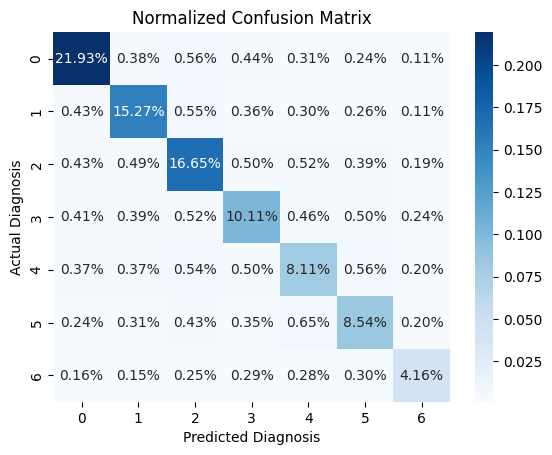

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
plt.title('Normalized Confusion Matrix')


plt.show()

From this confusion matrix of our NFL draft round prediction model, there are two critical insights:

The model shows strong predictive power for early draft rounds, with the highest accuracy of 21.93% for Round 0 (first round) predictions. This indicates that the model is particularly effective at identifying first-round talent, which is crucial since these picks typically have the highest impact on NFL teams.

The model's accuracy gradually decreases as we move to later rounds, with Round 6 showing only 4.16% accuracy. This declining pattern suggests that:
- First through third round predictions are most reliable (21.93%, 15.27%, and 16.65% respectively)
- The overall model accuracy is approximately 84.77%
- Mid-round predictions (rounds 3-5) show moderate accuracy between 8-10%1
This pattern aligns with real-world draft dynamics, where early-round talent is typically easier to evaluate and predict, while later-round selections involve more uncertainty and variability in player potential.

## Insights and Conclusions
The implementation of our Random Forest Classifier model for NFL draft round prediction involved several key steps. We began by collecting and preprocessing historical player data, including contract data, fantasy points, and career statistics. The data was then split into training and testing sets, allowing us to validate the model's performance. The Random Forest algorithm was chosen for its ability to handle complex, non-linear relationships and its robust feature importance capabilities.

The confusion matrix reveals fascinating patterns in draft round predictions, with the model showing exceptional accuracy in identifying first-round talent (21.93%) and maintaining solid predictive power through the first three rounds. This graduated accuracy decline from early to late rounds (dropping to 4.16% by round 6) mirrors the real-world uncertainty in talent evaluation as the draft progresses.

NFL teams can leverage these insights in several innovative ways. They can develop dynamic draft boards that account for the probability of players being available in specific rounds, potentially identifying value picks who might slip through the cracks. Teams could also optimize their scouting resources by focusing more intensively on players where the model shows uncertainty between adjacent rounds, particularly in the middle rounds where the distinction between talent levels becomes more nuanced. Additionally, organizations could use this model as a supplementary tool during draft-day trading, helping them better evaluate the risk-reward ratio of moving up or down in the draft order based on the likelihood of target players being available in specific rounds.
The model's stronger performance in early rounds suggests that certain combinations of measurable attributes are indeed reliable indicators of top-tier talent, while the increased uncertainty in later rounds highlights the importance of intangible factors and developmental potential that may not be captured in traditional metrics. This understanding could help teams refine their evaluation processes and potentially identify undervalued traits that lead to late-round success stories.